<a href="https://colab.research.google.com/github/pillaisamarth/clg-proj/blob/main/Lag_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 369 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# **Setting Default plotting styles**

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

# **Fetching Stock prices using yfinance Library**

In this section we will get stock prices over four years for Google and Microsoft. However, for analysis, we will focus on Google stock prices for this entire program

In [ ]:
tech_list = [
    'GOOG',
    'MSFT'
]

end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

for stocks in tech_list:
    globals()[stocks] = yf.download(stocks, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **Function Definitions**

In This section, we will describe some functions later used in the program



In [ ]:
def min_max_1000(df):
  sd = df.copy()
  sd['Close'] = (sd['Close'] - sd['Close'].min()) / sd['Close'].max()
  sd['Close'] = sd['Close'] * 1000
  return sd

In [ ]:
from sklearn.model_selection import train_test_split
def data_split(X, y, test_size = 0.2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, shuffle = False)
  return (X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
def get_score(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

# Creating DataFrame for Google Stock prices




In [ ]:
df = pd.DataFrame(GOOG[['Close']].copy())
df.head()

,Close
Date,
2018-11-27,52.220501
2018-11-28,54.311501
2018-11-29,54.415001
2018-11-30,54.721500
2018-12-03,55.321499


In [ ]:
sd = df.copy()
sd.head()

,Close
Date,
2018-11-27,52.220501
2018-11-28,54.311501
2018-11-29,54.415001
2018-11-30,54.721500
2018-12-03,55.321499


# Checking Correlation between target variables and Lags

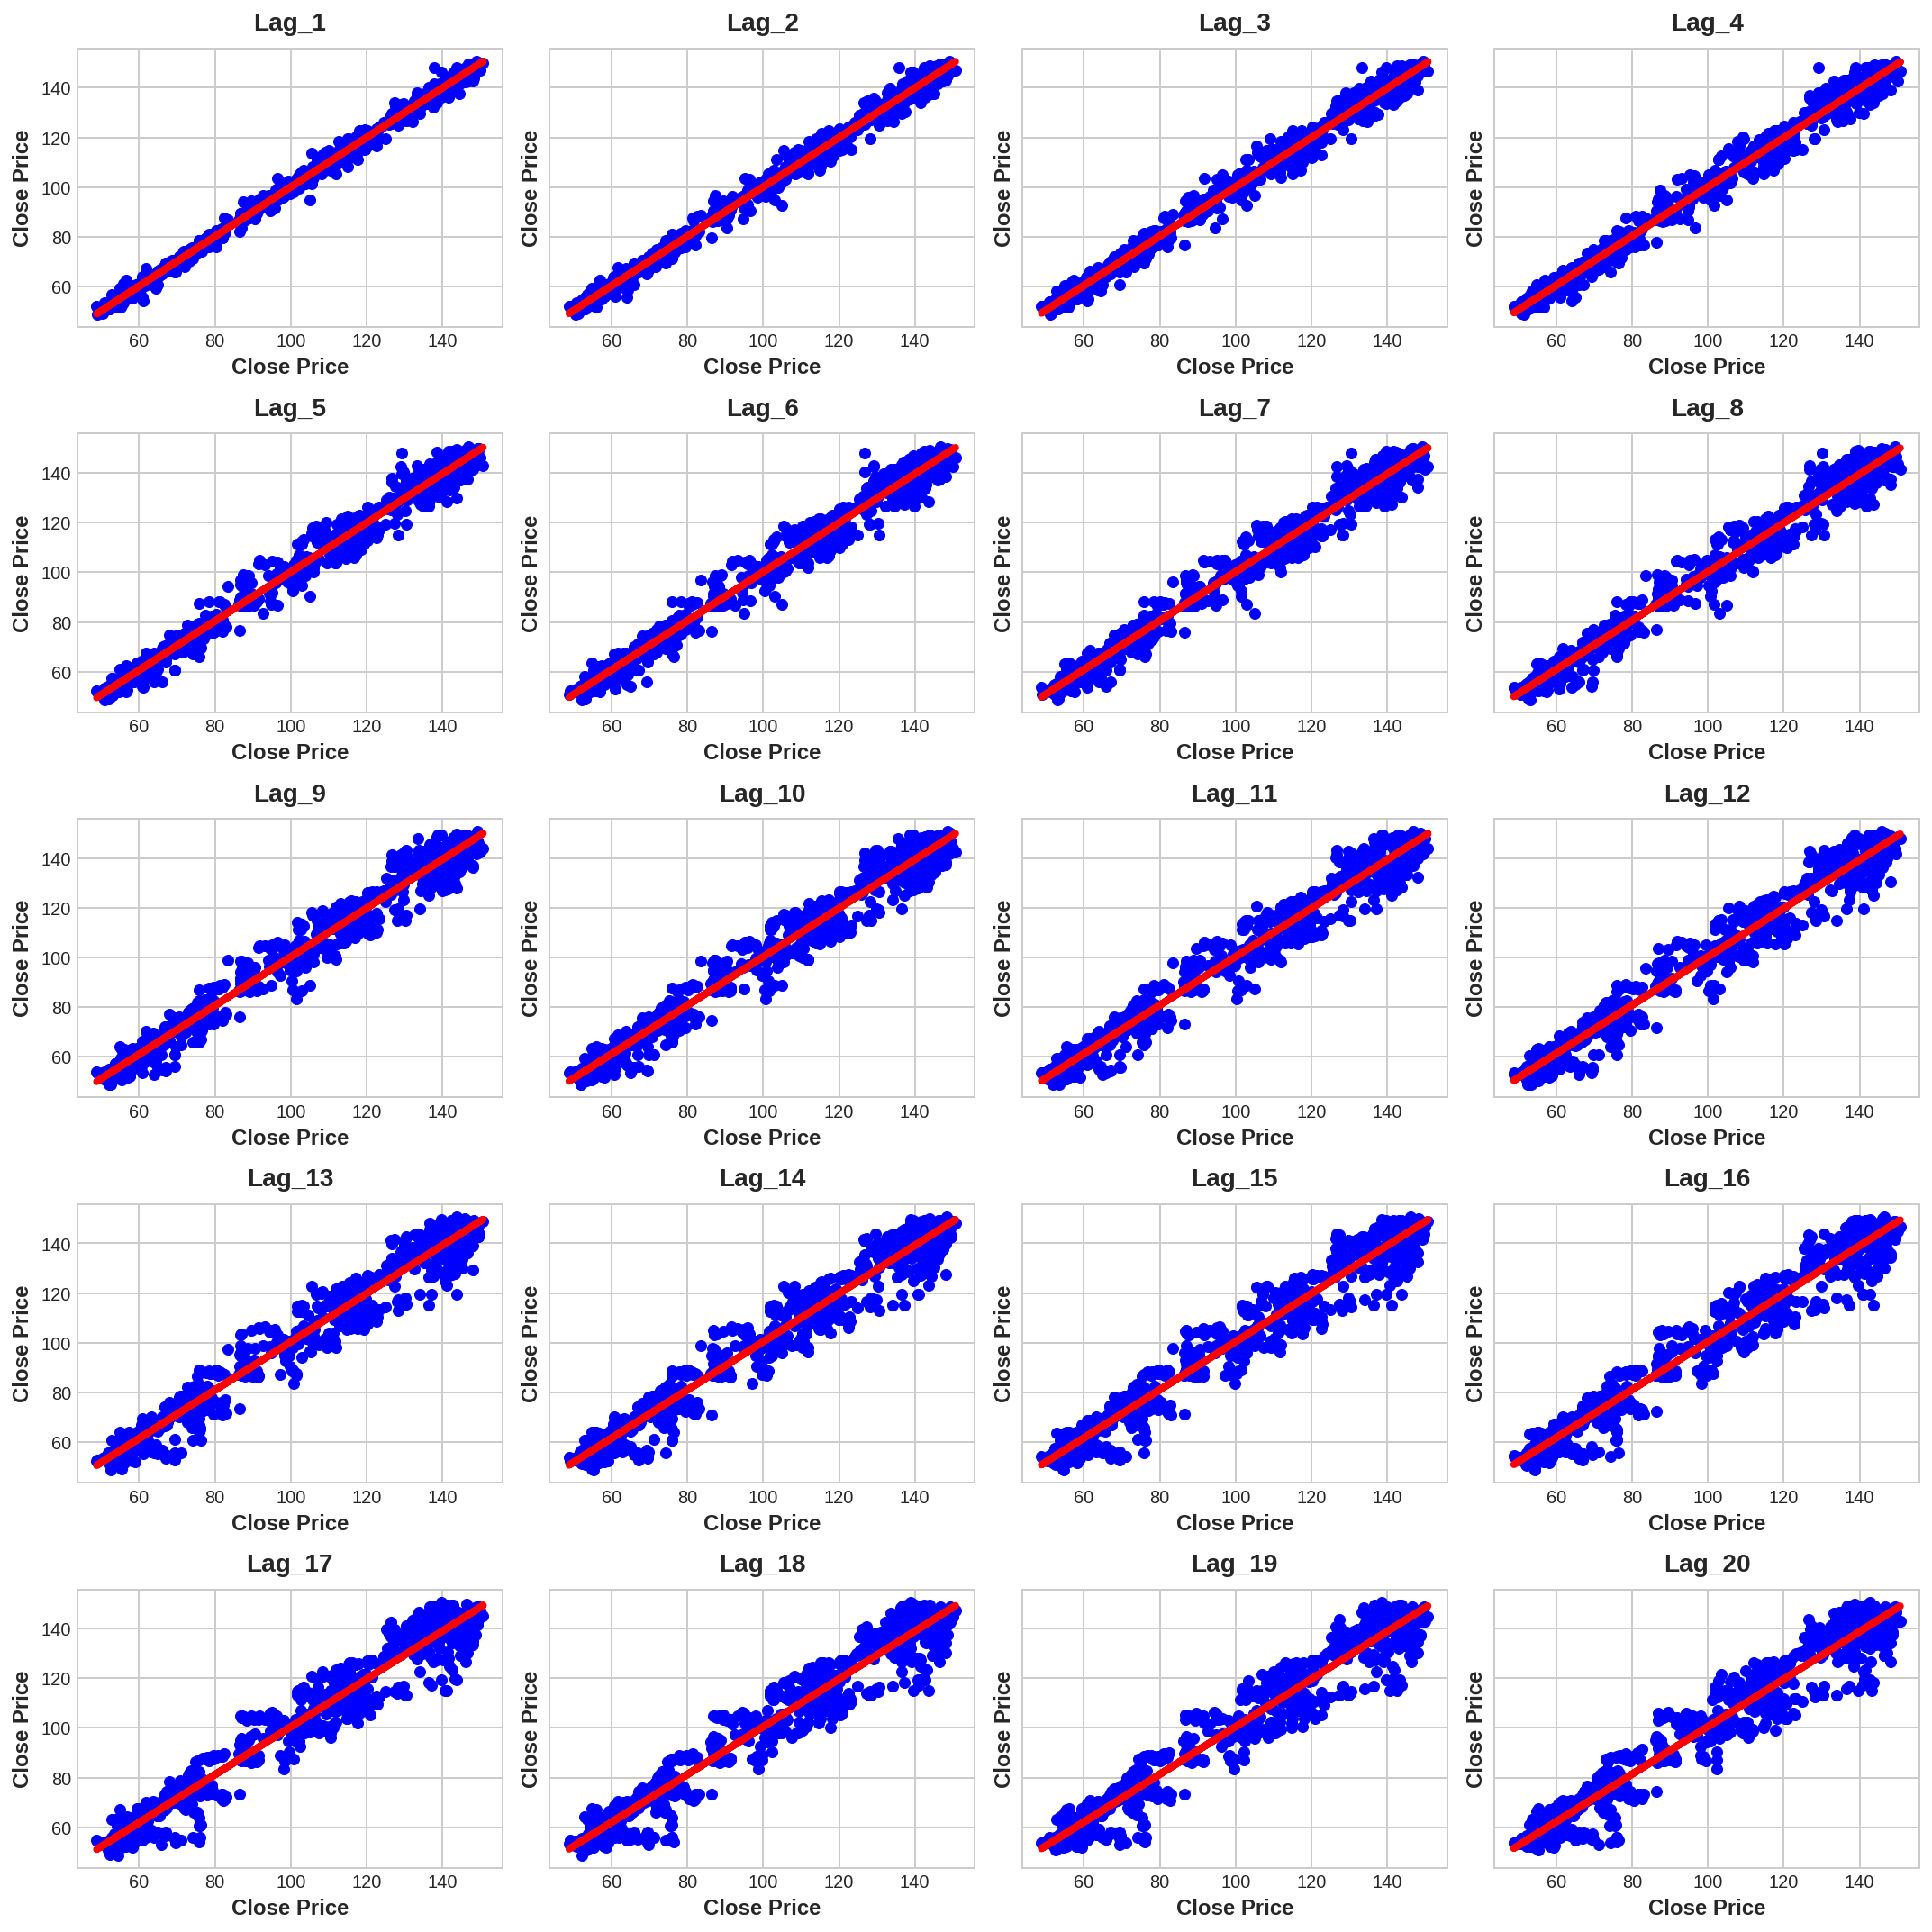

In [ ]:
lag = 20
fig, ax = plt.subplots(5, 4, sharey = True)
fig.set_figheight(15)
fig.set_figwidth(15)
for lg in range(1, lag + 1):
  lagged_data = sd.copy()
  lagged_data[f'Lag_{lg}'] = sd['Close'].shift(lg)
  lagged_data.dropna(axis = 0, inplace = True)
  m, b = np.polyfit(lagged_data[f'Lag_{lg}'], lagged_data['Close'], 1)
  # print(lagged_data.head())
  ax[(lg - 1) // 4, (lg - 1) % 4].set_title(f'Lag_{lg}')
  ax[(lg - 1) // 4, (lg - 1) % 4].set_ylabel('Close Price')
  ax[(lg - 1) // 4, (lg - 1) % 4].set_xlabel('Close Price')
  ax[(lg - 1) // 4, (lg - 1) % 4].scatter(lagged_data[f'Lag_{lg}'], lagged_data['Close'], color = 'b')
  ax[(lg - 1) // 4, (lg - 1) % 4].plot(lagged_data[f'Lag_{lg}'], m * lagged_data[f'Lag_{lg}'] + b, color = 'r')
  


In [ ]:
for lg in range(1, 10):
  print(lg)

1
2
3
4
5
6
7
8
9


In [ ]:
bst_lg = 20
lagged_data = sd.copy()
lagged_data[f'Lag_{bst_lg}'] = sd['Close'].shift(bst_lg)

In [ ]:
lagged_data.dropna(axis = 0, inplace = True)
lagged_data.head()

,Close,Lag_20
Date,,
2018-12-27,52.194000,52.220501
2018-12-28,51.854000,54.311501
2018-12-31,51.780499,54.415001
2019-01-02,52.292500,54.721500
2019-01-03,50.803001,55.321499


In [ ]:
target = lagged_data.copy()
target.drop([f'Lag_{bst_lg}'], axis = 1, inplace = True)
lagged_data.drop(['Close'], axis = 1, inplace = True)

In [ ]:
lagged_data.head()

,Lag_20
Date,
2018-12-27,52.220501
2018-12-28,54.311501
2018-12-31,54.415001
2019-01-02,54.721500
2019-01-03,55.321499


In [ ]:
target.head()

,Close
Date,
2018-12-27,52.194000
2018-12-28,51.854000
2018-12-31,51.780499
2019-01-02,52.292500
2019-01-03,50.803001


In [ ]:
X_train, X_test, y_train,y_test = data_split(lagged_data, target)

In [ ]:
X_train.head()

,Lag_20
Date,
2018-12-27,52.220501
2018-12-28,54.311501
2018-12-31,54.415001
2019-01-02,54.721500
2019-01-03,55.321499


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = pd.DataFrame(model.predict(X_test), index = X_test.index, columns = ['Close'])

In [ ]:
y_pred.head()

,Close
Date,
2022-02-14,141.755749
2022-02-15,138.269999
2022-02-16,137.633367
2022-02-17,135.494166
2022-02-18,132.089674


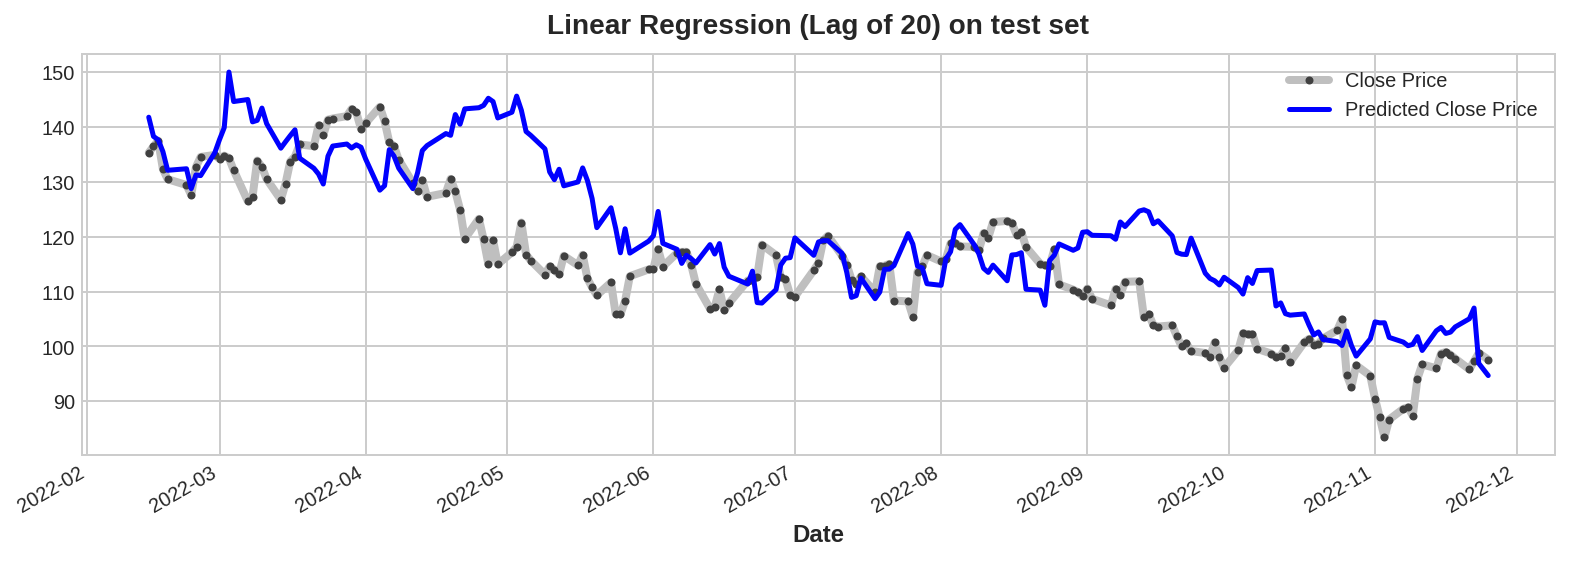

In [ ]:
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax = ax, linewidth = 2.5, color = 'b')
ax.set_title('Linear Regression (Lag of 20) on test set')
ax.legend(['Close Price', 'Predicted Close Price'])

In [ ]:
error = mean_absolute_percentage_error(y_true = y_test, y_pred = y_pred)
print(error)

7.806282296424019


In [ ]:
y_train_pred = pd.DataFrame(model.predict(X_train), index = X_train.index, columns = ['predictions'])

,predictions
Date,
2018-12-27,54.446529
2018-12-28,56.531397
2018-12-31,56.634594
2019-01-02,56.940195
2019-01-03,57.538434
...,...
2022-02-07,138.981910
2022-02-08,140.546811
2022-02-09,141.986075
